#### data collection and data exploration 

In [2]:
## Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
print('current working dir:', os.getcwd())

## load data
data = pd.read_csv('../data/TOI.csv', comment= '#')

data

current working dir: c:\Users\topol\Exoplanet--Chronicles\notebooks


,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,-0.085,...,4.19,0.07,-0.07,0,2.169860,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,-0.102,...,4.03,0.09,-0.09,0,2.010000,0.090000,-0.090000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,-0.206,...,NaN,NaN,NaN,0,5.730000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,-0.041,...,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,-0.069,...,4.14,0.07,-0.07,0,2.150000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7212,995.01,317951248,FP,07h23m14.75s,110.811443,+05d33m46.26s,5.562850,2.061,0.405,-0.405,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
7213,996.01,142918609,FP,07h57m23.99s,119.349948,-19d30m57.65s,-19.516015,-3.900,0.848,-0.848,...,NaN,NaN,NaN,0,2.050000,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
7214,997.01,341729521,FP,08h05m16.69s,121.319521,-59d34m47.27s,-59.579798,-44.770,0.044,-0.044,...,4.52,0.08,-0.08,0,0.926261,0.045789,-0.045789,0,2019-07-24 15:58:33,2024-09-09 10:08:01
7215,998.01,54390047,FP,07h53m16.69s,118.319555,-14d13m07.76s,-14.218823,-1.706,0.069,-0.069,...,4.01,0.07,-0.07,0,2.349860,0.091578,-0.091578,0,2019-07-24 15:58:33,2024-09-09 10:08:01


In [ ]:
data.head()

,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,-0.085,...,4.19,0.07,-0.07,0,2.16986,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,-0.102,...,4.03,0.09,-0.09,0,2.01000,0.090000,-0.090000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,-0.206,...,NaN,NaN,NaN,0,5.73000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,-0.041,...,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,-0.069,...,4.14,0.07,-0.07,0,2.15000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01


In [5]:
data.shape

(7217, 65)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7217 entries, 0 to 7216
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   toi              7217 non-null   float64
 1   tid              7217 non-null   int64  
 2   tfopwg_disp      7215 non-null   object 
 3   rastr            7217 non-null   object 
 4   ra               7217 non-null   float64
 5   decstr           7217 non-null   object 
 6   dec              7217 non-null   float64
 7   st_pmra          7098 non-null   float64
 8   st_pmraerr1      7098 non-null   float64
 9   st_pmraerr2      7098 non-null   float64
 10  st_pmralim       7098 non-null   float64
 11  st_pmdec         7098 non-null   float64
 12  st_pmdecerr1     7098 non-null   float64
 13  st_pmdecerr2     7098 non-null   float64
 14  st_pmdeclim      7098 non-null   float64
 15  pl_tranmid       7217 non-null   float64
 16  pl_tranmiderr1   7207 non-null   float64
 17  pl_tranmiderr2

In [ ]:
data.describe()

,toi,tid,ra,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmdec,st_pmdecerr1,...,st_tefferr2,st_tefflim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim
count,7217.000000,7.217000e+03,7217.000000,7217.000000,7098.000000,7098.000000,7098.000000,7098.0,7098.000000,7098.000000,...,6789.000000,7217.0,6421.000000,5129.000000,5129.000000,7217.0,6746.000000,5416.000000,5416.000000,7217.0
mean,3520.873440,2.447754e+08,174.054880,-0.638640,-0.890660,0.227841,-0.227841,0.0,-9.098241,0.221824,...,-209.970456,0.0,4.305726,0.180285,-0.180285,0.0,1.407269,0.075120,-0.075120,0.0
std,2017.856672,1.634650e+08,101.318247,47.859668,78.793513,0.635892,0.635892,0.0,68.187016,0.625859,...,567.055152,0.0,0.304831,0.361231,0.361231,0.0,1.641548,0.084573,0.084573,0.0
min,101.010000,2.876000e+03,0.084680,-89.471513,-1624.050000,0.015000,-8.000000,0.0,-1230.620000,0.016000,...,-7000.000000,0.0,0.100000,0.000391,-2.010840,0.0,0.114827,0.003357,-1.723020,0.0
25%,1759.010000,1.303497e+08,94.009904,-44.938923,-11.091000,0.038000,-0.080000,0.0,-14.790000,0.038000,...,-157.000000,0.0,4.130000,0.080000,-0.095541,0.0,0.890000,0.050000,-0.080000,0.0
50%,3501.010000,2.455095e+08,153.910453,0.493167,-1.791500,0.051000,-0.051000,0.0,-3.339000,0.049000,...,-129.510000,0.0,4.330000,0.085631,-0.085631,0.0,1.235425,0.060000,-0.060000,0.0
75%,5273.010000,3.529249e+08,272.060717,42.627060,8.128250,0.080000,-0.038000,0.0,5.143250,0.071000,...,-122.000000,0.0,4.500000,0.095541,-0.080000,0.0,1.660000,0.080000,-0.050000,0.0
max,7045.010000,2.041563e+09,359.933006,89.086923,2074.520000,8.000000,-0.015000,0.0,1048.840000,8.000000,...,-7.824290,0.0,5.960650,2.010840,-0.000391,0.0,102.030000,1.723020,-0.003357,0.0


In [8]:
#data.dtypes

#### We can remove all columns that are not important to our dataset, those are columns that will not contribute to what we aim to achieve

In [9]:
## drop all irrelevant columns
data = data.drop(['rastr', 'decstr', 'toi_created', 
                 'rowupdate', 'toi', 'tid', 'st_pmraerr1', 'st_pmraerr2'], axis= 1)

In [ ]:
data

,tfopwg_disp,ra,dec,st_pmra,st_pmralim,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,pl_tranmid,...,st_tefferr2,st_tefflim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim
0,FP,112.357708,-12.695960,-5.964,0.0,-0.076,0.072,-0.072,0.0,2.459230e+06,...,-264.7,0,4.19,0.07,-0.07,0,2.169860,0.072573,-0.072573,0
1,PC,122.580465,-5.513852,-4.956,0.0,-15.555,0.072,-0.072,0.0,2.459988e+06,...,-126.4,0,4.03,0.09,-0.09,0,2.010000,0.090000,-0.090000,0
2,FP,104.726966,-10.580455,-1.462,0.0,-2.249,0.206,-0.206,0.0,2.459225e+06,...,-124.0,0,NaN,NaN,NaN,0,5.730000,NaN,NaN,0
3,FP,110.559945,-25.207017,-0.939,0.0,1.640,0.055,-0.055,0.0,2.458493e+06,...,-567.0,0,4.15,1.64,-1.64,0,NaN,NaN,NaN,0
4,FP,122.178195,-48.802811,-4.496,0.0,9.347,0.062,-0.062,0.0,2.459987e+06,...,-171.1,0,4.14,0.07,-0.07,0,2.150000,0.060000,-0.060000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7212,FP,110.811443,5.562850,2.061,0.0,-7.082,0.336,-0.336,0.0,2.458494e+06,...,-46.5,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0
7213,FP,119.349948,-19.516015,-3.900,0.0,3.866,1.158,-1.158,0.0,2.458495e+06,...,NaN,0,NaN,NaN,NaN,0,2.050000,NaN,NaN,0
7214,FP,121.319521,-59.579798,-44.770,0.0,-2.616,0.036,-0.036,0.0,2.459230e+06,...,-132.9,0,4.52,0.08,-0.08,0,0.926261,0.045789,-0.045789,0
7215,FP,118.319555,-14.218823,-1.706,0.0,-1.714,0.061,-0.061,0.0,2.459230e+06,...,-130.7,0,4.01,0.07,-0.07,0,2.349860,0.091578,-0.091578,0


In [ ]:
data.dtypes

tfopwg_disp         object
ra                 float64
dec                float64
st_pmra            float64
st_pmralim         float64
st_pmdec           float64
st_pmdecerr1       float64
st_pmdecerr2       float64
st_pmdeclim        float64
pl_tranmid         float64
pl_tranmiderr1     float64
pl_tranmiderr2     float64
pl_tranmidlim        int64
pl_orbper          float64
pl_orbpererr1      float64
pl_orbpererr2      float64
pl_orbperlim         int64
pl_trandurh        float64
pl_trandurherr1    float64
pl_trandurherr2    float64
pl_trandurhlim       int64
pl_trandep         float64
pl_trandeperr1     float64
pl_trandeperr2     float64
pl_trandeplim        int64
pl_rade            float64
pl_radeerr1        float64
pl_radeerr2        float64
pl_radelim           int64
pl_insol           float64
pl_insolerr1       float64
pl_insolerr2       float64
pl_insollim        float64
pl_eqt             float64
pl_eqterr1         float64
pl_eqterr2         float64
pl_eqtlim          float64
s

#### lets make a copy of dataset for preprocessing

In [12]:
df = data.copy()

In [13]:
## lets rename tfopwg_disp to just disposition
df.rename(columns= {'tfopwg_disp' : 'disposition'}, inplace= True)

#### since all columns are numerical except our target column `disposition`, we can check the missing values and convert disposition into numerical format using get_dummies from pd

In [14]:
## check missing targets
df['disposition'].isna().sum()

2

In [15]:
# Drop rows where 'disposition' is NaN
df = df.dropna(subset=['disposition'])

In [16]:
df['disposition'].value_counts()

disposition
PC     4624
FP     1069
KP      537
CP      463
APC     428
FA       94
Name: count, dtype: int64

In [17]:
# Drop FA
df = df[df['disposition'] != 'FA']

#### For our target `disposition` we can map all the above targets into numbers for model simplicisty

####  PC == 1                 CANDIDATE 
####  FP == 2                 False Positive 
####  KP == 3                 Known Planet 
####  CP == 4                 Confirmed Planet 
####  APC == 5                Additional Planet Candidate 

In [18]:
## the mapping for disposition

disposition_mapping = {'PC': 1,                 # CANDIDATE 
                      'FP': 2,                  # False Positive 
                      'KP': 3,                  # Known Planet 
                      'CP': 4,                  # Confirmed Planet 
                      'APC': 5,                 # Additional Planet Candidate 
}

# Convert the `disposition` column to numeric values
df['disposition'] = df['disposition'].map(disposition_mapping)

In [19]:
df['disposition'].value_counts()

disposition
1    4624
2    1069
3     537
4     463
5     428
Name: count, dtype: int64

#### lets check missing values

In [ ]:
## nan
df.isna()

,disposition,ra,dec,st_pmra,st_pmralim,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,pl_tranmid,...,st_tefferr2,st_tefflim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7212,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,True,True,True,False
7213,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,True,True,False
7214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
## sum of nan
df.isna().sum()

disposition           0
ra                    0
dec                   0
st_pmra             113
st_pmralim          113
st_pmdec            113
st_pmdecerr1        113
st_pmdecerr2        113
st_pmdeclim         113
pl_tranmid            0
pl_tranmiderr1        9
pl_tranmiderr2        9
pl_tranmidlim         0
pl_orbper            98
pl_orbpererr1       120
pl_orbpererr2       120
pl_orbperlim          0
pl_trandurh           0
pl_trandurherr1      13
pl_trandurherr2      13
pl_trandurhlim        0
pl_trandep            0
pl_trandeperr1        4
pl_trandeperr2        4
pl_trandeplim         0
pl_rade             461
pl_radeerr1        1480
pl_radeerr2        1480
pl_radelim            0
pl_insol            144
pl_insolerr1       7121
pl_insolerr2       7121
pl_insollim        7121
pl_eqt              268
pl_eqterr1         7121
pl_eqterr2         7121
pl_eqtlim          7121
st_tmag               0
st_tmagerr1           0
st_tmagerr2           0
st_tmaglim            0
st_dist         

In [22]:
df.isna().mean()

disposition        0.000000
ra                 0.000000
dec                0.000000
st_pmra            0.015869
st_pmralim         0.015869
st_pmdec           0.015869
st_pmdecerr1       0.015869
st_pmdecerr2       0.015869
st_pmdeclim        0.015869
pl_tranmid         0.000000
pl_tranmiderr1     0.001264
pl_tranmiderr2     0.001264
pl_tranmidlim      0.000000
pl_orbper          0.013762
pl_orbpererr1      0.016852
pl_orbpererr2      0.016852
pl_orbperlim       0.000000
pl_trandurh        0.000000
pl_trandurherr1    0.001826
pl_trandurherr2    0.001826
pl_trandurhlim     0.000000
pl_trandep         0.000000
pl_trandeperr1     0.000562
pl_trandeperr2     0.000562
pl_trandeplim      0.000000
pl_rade            0.064738
pl_radeerr1        0.207836
pl_radeerr2        0.207836
pl_radelim         0.000000
pl_insol           0.020222
pl_insolerr1       1.000000
pl_insolerr2       1.000000
pl_insollim        1.000000
pl_eqt             0.037635
pl_eqterr1         1.000000
pl_eqterr2         1

In [23]:
##
df.columns[df.isna().mean() >= 1]

Index(['pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim'],
      dtype='object')

#### so we can drop these above columns with nan mean greater than 1

In [24]:
df = df.drop(['pl_insolerr1', 'pl_insolerr2',
              'pl_insollim', 'pl_eqterr1',
              'pl_eqterr2', 'pl_eqtlim'], axis= 1)

In [25]:
## replace nan with mean of each attribute
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

In [ ]:
## check missing values again
df.isna().sum()

disposition        0
ra                 0
dec                0
st_pmra            0
st_pmralim         0
st_pmdec           0
st_pmdecerr1       0
st_pmdecerr2       0
st_pmdeclim        0
pl_tranmid         0
pl_tranmiderr1     0
pl_tranmiderr2     0
pl_tranmidlim      0
pl_orbper          0
pl_orbpererr1      0
pl_orbpererr2      0
pl_orbperlim       0
pl_trandurh        0
pl_trandurherr1    0
pl_trandurherr2    0
pl_trandurhlim     0
pl_trandep         0
pl_trandeperr1     0
pl_trandeperr2     0
pl_trandeplim      0
pl_rade            0
pl_radeerr1        0
pl_radeerr2        0
pl_radelim         0
pl_insol           0
pl_eqt             0
st_tmag            0
st_tmagerr1        0
st_tmagerr2        0
st_tmaglim         0
st_dist            0
st_disterr1        0
st_disterr2        0
st_distlim         0
st_teff            0
st_tefferr1        0
st_tefferr2        0
st_tefflim         0
st_logg            0
st_loggerr1        0
st_loggerr2        0
st_logglim         0
st_rad       

In [27]:
df.isna().sum().sum()

0

####

#### Visualization

#### Probability distribution of orbital period

#### Orbital period is just number of days it takes an exoplanet to go around the parent star

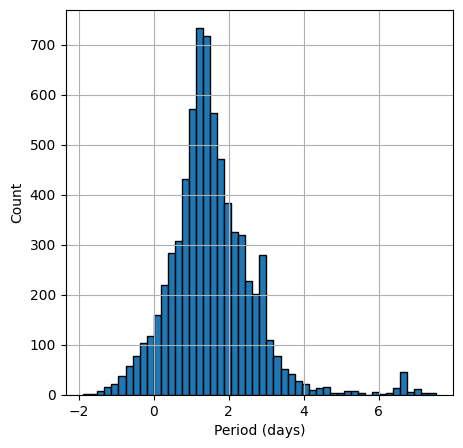

In [28]:
## period
plt.figure(figsize= (5, 5))

plt.hist(df['pl_orbper'].apply(np.log), bins= 50, edgecolor= 'black')
plt.ylabel('Count')
plt.xlabel('Period (days)')
plt.grid(True)

plt.show()

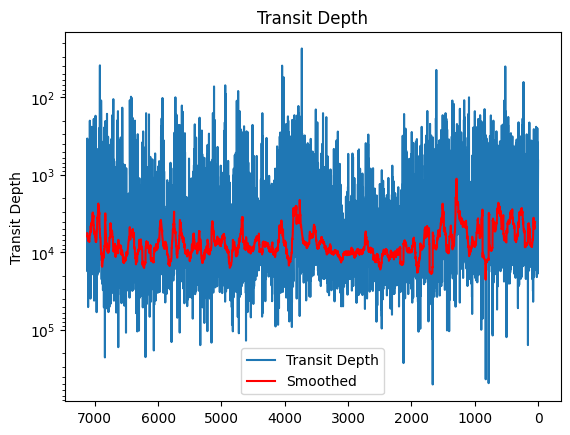

In [29]:
## transit plot
#real_time = df['pl_trandurh']                                   # real transit time
time_nonreal = np.arange(len(df['pl_trandep']))
rolling_avg = df['pl_trandep'].rolling(window= 50).mean() 

plt.plot(time_nonreal ,df['pl_trandep'], label= "Transit Depth", markersize= 2)
plt.plot(time_nonreal, rolling_avg, label= 'Smoothed', color= 'red')
plt.gca().invert_xaxis()                  # Flip x-axis
plt.gca().invert_yaxis()
plt.yscale('log')                        # Apply log scale


 
plt.xlabel('')
plt.ylabel('Transit Depth')
plt.title('Transit Depth')

plt.legend()
plt.show()

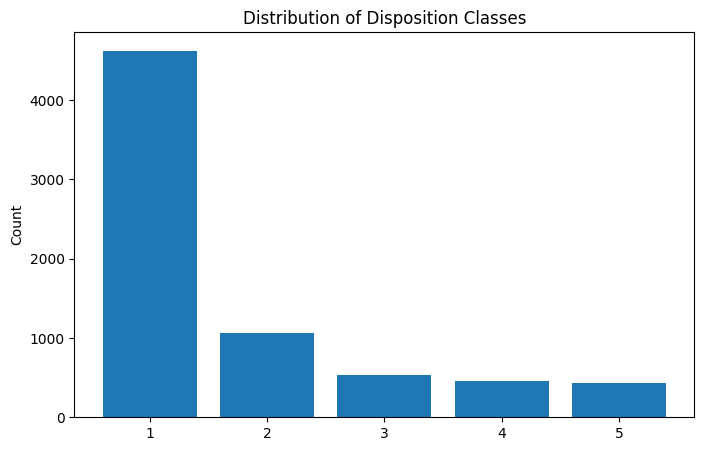

In [30]:
## plot of disposition classes
target_counts = df['disposition'].value_counts()

plt.figure(figsize= (8, 5))
plt.bar(target_counts.index, target_counts.values)
plt.ylabel('Count')
plt.title('Distribution of Disposition Classes')
#plt.xticks(ticks= target_counts.index, labels= ['Candidate', 'FP', 'Known', 'Confirmed', 'Additional'])

plt.show()

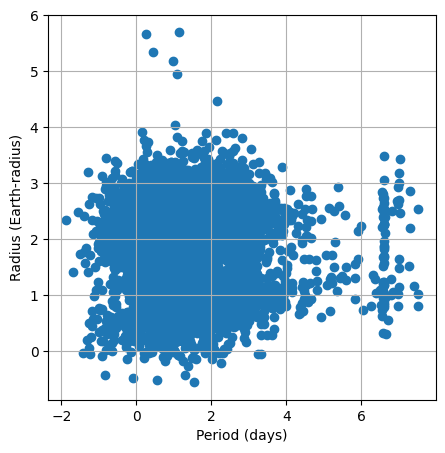

In [31]:
## radius vs period
plt.figure(figsize= (5, 5))

plt.scatter(df['pl_orbper'].apply(np.log), df['pl_rade'].apply(np.log))
plt.ylabel('Radius (Earth-radius)')
plt.xlabel('Period (days)')
plt.grid(True)

plt.show()

####

#### Processing

In [32]:
## copy of df for processing
df = df.copy()

In [33]:
## define X and y
y = df['disposition']
X = df.drop(columns= ['disposition'])

In [34]:
X.head()

,ra,dec,st_pmra,st_pmralim,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,pl_tranmid,pl_tranmiderr1,...,st_tefferr2,st_tefflim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim
0,112.357708,-12.695960,-5.964,0.0,-0.076,0.072,-0.072,0.0,2.459230e+06,0.001657,...,-264.7,0,4.190000,0.07000,-0.07000,0,2.169860,0.072573,-0.072573,0
1,122.580465,-5.513852,-4.956,0.0,-15.555,0.072,-0.072,0.0,2.459988e+06,0.001916,...,-126.4,0,4.030000,0.09000,-0.09000,0,2.010000,0.090000,-0.090000,0
2,104.726966,-10.580455,-1.462,0.0,-2.249,0.206,-0.206,0.0,2.459225e+06,0.000625,...,-124.0,0,4.305148,0.18008,-0.18008,0,5.730000,0.074584,-0.074584,0
3,110.559945,-25.207017,-0.939,0.0,1.640,0.055,-0.055,0.0,2.458493e+06,0.005350,...,-567.0,0,4.150000,1.64000,-1.64000,0,1.404602,0.074584,-0.074584,0
4,122.178195,-48.802811,-4.496,0.0,9.347,0.062,-0.062,0.0,2.459987e+06,0.003748,...,-171.1,0,4.140000,0.07000,-0.07000,0,2.150000,0.060000,-0.060000,0


In [35]:
y.value_counts()

disposition
1    4624
2    1069
3     537
4     463
5     428
Name: count, dtype: int64

In [36]:
## data split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.90, shuffle= True, random_state = 12)

In [37]:
X_train.shape

(6408, 50)

In [38]:
X_test.head()

,ra,dec,st_pmra,st_pmralim,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,pl_tranmid,pl_tranmiderr1,...,st_tefferr2,st_tefflim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim
4485,164.519868,-56.385999,-10.238,0.0,2.621,0.030,-0.030,0.0,2.459332e+06,0.002404,...,-141.4,0,4.30,0.08,-0.08,0,1.54000,0.060000,-0.060000,0
1422,353.281713,-76.819155,25.760,0.0,3.012,0.026,-0.026,0.0,2.459039e+06,0.001163,...,-5242.7,0,4.40,2.00,-2.00,0,1.12916,0.061382,-0.061382,0
2738,133.542032,-48.072792,-13.597,0.0,5.808,0.049,-0.049,0.0,2.459297e+06,0.002237,...,-235.3,0,4.37,0.53,-0.53,0,1.58000,0.050000,-0.050000,0
4979,46.330681,28.185824,-0.810,0.0,-2.380,0.147,-0.147,0.0,2.459521e+06,0.000867,...,-128.2,0,4.17,0.09,-0.09,0,1.41000,0.080000,-0.080000,0
4548,197.546500,-54.218835,-13.343,0.0,-4.016,0.033,-0.033,0.0,2.459358e+06,0.002029,...,-138.2,0,4.17,0.09,-0.09,0,1.75000,0.080000,-0.080000,0


In [39]:
## scaling
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [40]:
## define ML models in a dictionary
model = { 
        'LogisticRegression': LogisticRegression(), 
        'DecisionTree': DecisionTreeClassifier(),
        'RandomForest': RandomForestClassifier(n_estimators= 70, random_state= 12)
}

In [41]:
## Train the model

try:
    for name, model in model.items(): 
        model.fit(X_train_scaled, y_train) 
        print(name, 'Trained Successfully!')

except Exception as e:
        print(f'All models Failed to train: {e}')    

LogisticRegression Trained Successfully!
DecisionTree Trained Successfully!
RandomForest Trained Successfully!


#### Evaluation 

In [42]:
## pred since all models trained successfully
y_pred = model.predict(X_test_scaled)

#### Accuracy and score

In [43]:
## from metrics formulae
model_accuracy = accuracy_score(y_test, y_pred)
model_report = classification_report(y_test, y_pred)
model_confusion_matrix = confusion_matrix(y_test, y_pred)

In [44]:
print('model perfomance:')
print(f'Accuracy: {model_accuracy * 100:.2f}%')
print('\nClassification report:\n')
print(model_report)
#confusion = pd.DataFrame(model_confusion_matrix, 
#                         index=['Candidate', 'FP', 'Known', 'Confirmed', 'Additional'], 
#                         columns=['Candidate', 'FP', 'Known', 'Confirmed', 'Additional'])
#print('\nconfusion matrix:\n')
#print(confusion)

model perfomance:
Accuracy: 74.19%

Classification report:

              precision    recall  f1-score   support

           1       0.75      0.95      0.84       459
           2       0.72      0.51      0.60       113
           3       0.67      0.44      0.53        36
           4       0.75      0.32      0.45        56
           5       0.33      0.04      0.07        49

    accuracy                           0.74       713
   macro avg       0.64      0.45      0.50       713
weighted avg       0.71      0.74      0.70       713



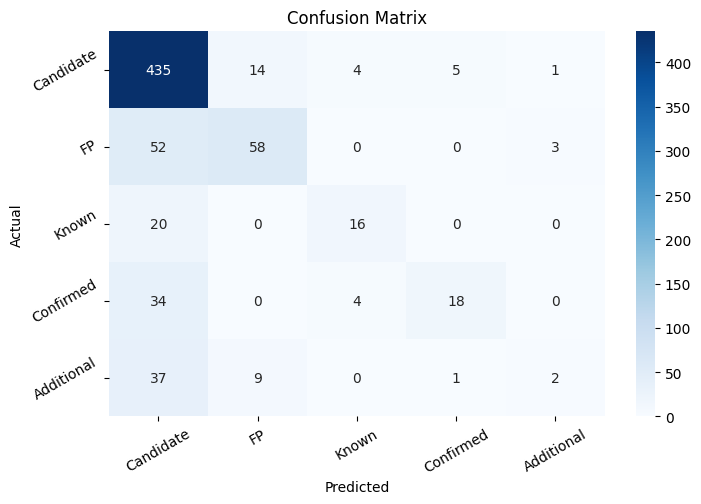

In [45]:
#y_pred = model.predict(X_test)                                    
cm = confusion_matrix(np.array(y_test), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sb.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues', 
            xticklabels=['Candidate', 'FP', 'Known', 'Confirmed', 'Additional'], 
            yticklabels=['Candidate', 'FP', 'Known', 'Confirmed', 'Additional'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# Rotate x-axis labels
plt.xticks(rotation= 30)
plt.yticks(rotation= 30)

plt.show()

In [46]:
## The model may need to be improved in future

In [47]:
##

#### Save the model

In [48]:
import joblib  # For newer scikit-learn versions

# trained model
joblib.dump(model, 'model.pkl')

['model.pkl']

In [49]:
df.to_csv('C:/Users/topol/Exoplanet--Chronicles/data/data_TOI.csv', index=False)

In [50]:
print(df.columns)

Index(['disposition', 'ra', 'dec', 'st_pmra', 'st_pmralim', 'st_pmdec',
       'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmid',
       'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_trandurh',
       'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandep',
       'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_insol', 'pl_eqt',
       'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_dist',
       'st_disterr1', 'st_disterr2', 'st_distlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_logg', 'st_loggerr1', 'st_loggerr2',
       'st_logglim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim'],
      dtype='object')
